### a) 

Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
movies = "../data/ml-latest/movies.csv"
rating = "../data/ml-latest/ratings.csv"

df_movies = pd.read_csv(movies)
df_rating = pd.read_csv(rating)
print(df_rating.head())
print(df_movies.head())

   userId  movieId  rating   timestamp
0       1        1     4.0  1225734739
1       1      110     4.0  1225865086
2       1      158     4.0  1225733503
3       1      260     4.5  1225735204
4       1      356     5.0  1225735119
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


Kontrollerar om det finns några NaN i dataseten. Vilket det inte gör.

In [26]:
df_movies.isna().any().any()

False

In [27]:
df_rating.isna().any().any()

False

Kollar skalan för rating.

In [28]:
df_rating["rating"].describe()

count    3.383216e+07
mean     3.542540e+00
std      1.063959e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Visar fördelningen av ratings i datasetet.

<Axes: >

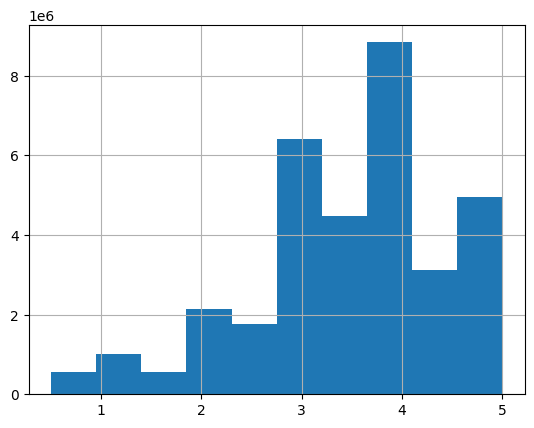

In [29]:
df_rating['rating'].hist() # creates a histogram over the ratings.


- df_movies beskriver 86,537 filmer. Filmerna har id (movieId) och titel(title). (genres) är en lista över genrer. 
- df_rating innehåller 33,832,162 betyg från användare. (userID) är vem som gett betyget. (movieID) är vilken film det gäller. (rating) är betyget på en skala (0.5-5). (timestamp) är när betyget sattes.

In [30]:
print(df_movies.info())
print(df_rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB
None


Nedan kod ger en överblick över datasetens storlek och omfång. 

In [31]:
print(df_rating.describe())
print(df_movies.describe())


             userId       movieId        rating     timestamp
count  3.383216e+07  3.383216e+07  3.383216e+07  3.383216e+07
mean   1.654380e+05  2.831348e+04  3.542540e+00  1.269362e+09
std    9.534122e+04  4.992865e+04  1.063959e+00  2.541023e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    8.295300e+04  1.219000e+03  3.000000e+00  1.046718e+09
50%    1.661290e+05  3.263000e+03  4.000000e+00  1.264740e+09
75%    2.474500e+05  4.049100e+04  4.000000e+00  1.496919e+09
max    3.309750e+05  2.889830e+05  5.000000e+00  1.689843e+09
             movieId
count   86537.000000
mean   155932.817096
std     78037.145347
min         1.000000
25%    111443.000000
50%    164574.000000
75%    211225.000000
max    288983.000000


-------

### b)

b) Vilka är de 10 filmerna med flest ratings?



In [32]:

# count the numbers of ratin for each movie
rating_counts = df_rating['movieId'].value_counts().head(10)

# get the titles 
ten_top_movies = df_movies[df_movies['movieId'].isin(rating_counts.index)].set_index('movieId')

# shows the top 10 movies with the most rating
ten_top_movies['rating_count'] = rating_counts
ten_top_movies = ten_top_movies.sort_values(by='rating_count', ascending=False)
ten_top_movies


,title,genres,rating_count
movieId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,122296
356,Forrest Gump (1994),Comedy|Drama|Romance|War,113581
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,108756
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,107056
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,101802
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,97202
2959,Fight Club (1999),Action|Crime|Drama|Thriller,86207
527,Schindler's List (1993),Drama|War,84232
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,83026


-----

### c)

c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.


In [33]:
# calculate the average rating of the ten_top_movies
average_ratings = df_rating[df_rating['movieId'].isin(rating_counts.index)].groupby('movieId')['rating'].mean()

# add the average rating to ten_top_movies
ten_top_movies['average_rating'] = average_ratings
ten_top_movies



,title,genres,rating_count,average_rating
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,122296,4.416792
356,Forrest Gump (1994),Comedy|Drama|Romance|War,113581,4.068189
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,108756,4.191778
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,107056,4.160631
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,101802,4.150287
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,97202,4.092400
2959,Fight Club (1999),Action|Crime|Drama|Thriller,86207,4.236019
527,Schindler's List (1993),Drama|War,84232,4.242337
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,83026,3.689013


------


In [34]:
average_ratings

movieId
260     4.092400
296     4.191778
318     4.416792
356     4.068189
480     3.689013
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
Name: rating, dtype: float64

### d)

d) Gör en plot över årtal och antalet filmer representerade i datasetet


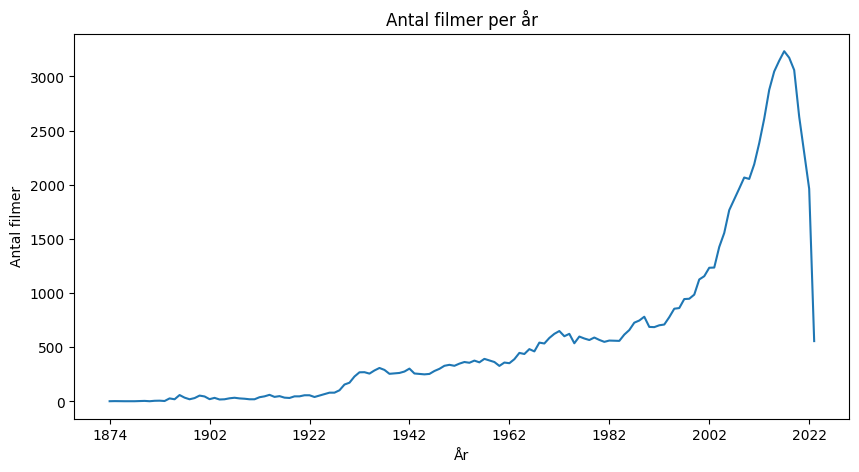

In [35]:
# Extract years from title and create a new column 'year'
df_movies['year'] = df_movies['title'].str.extract(r'(\(\d{4}\))').astype(str)
df_movies['year'] = df_movies['year'].str.extract('(\d{4})')

# calculate number of movies/year
movies_per_year = df_movies['year'].value_counts().sort_index()


plt.figure(figsize=(10, 5))
movies_per_year.plot(kind='line')
plt.title('Antal filmer per år')
plt.xlabel('År')
plt.ylabel('Antal filmer')
plt.show()



-----

### e)

e) Gör en plot över antalet ratings mot movieId

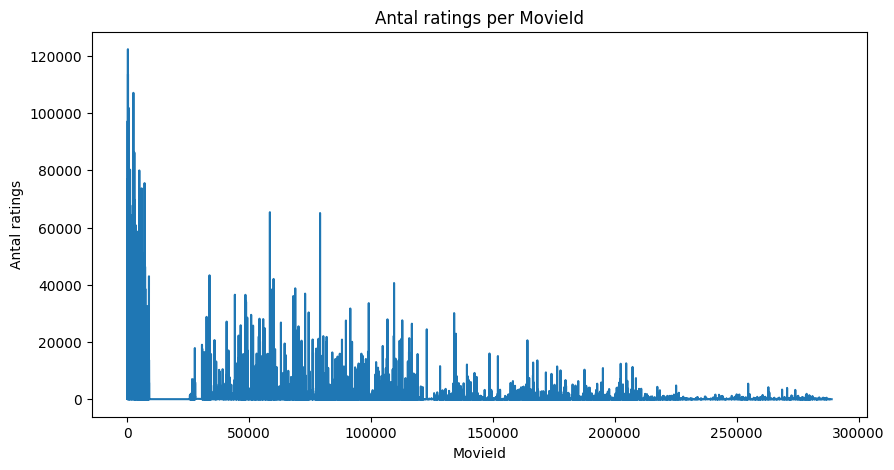

In [36]:
plt.figure(figsize=(10, 5))
df_rating['movieId'].value_counts().sort_index().plot()
plt.title('Antal ratings per MovieId')
plt.xlabel('MovieId')
plt.ylabel('Antal ratings')
plt.show()

------

### f)

f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över
dessa.

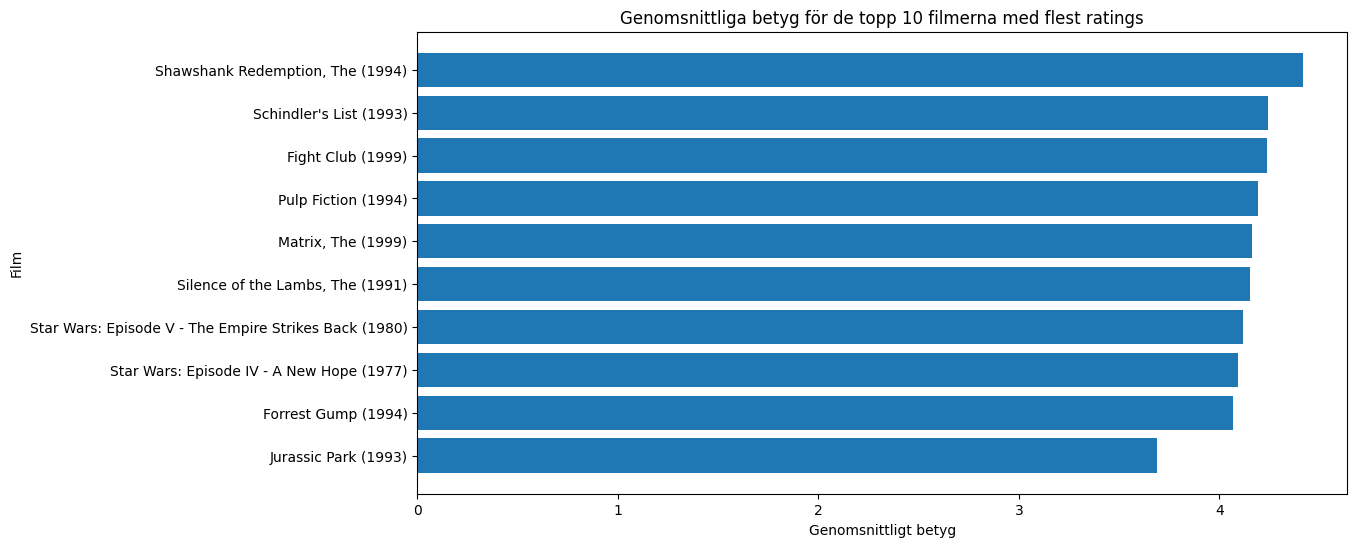

In [37]:

ten_top_movies_sorted = ten_top_movies.sort_values('average_rating', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(ten_top_movies_sorted['title'], ten_top_movies_sorted['average_rating'])
plt.xlabel('Genomsnittligt betyg')
plt.ylabel('Film')
plt.title('Genomsnittliga betyg för de topp 10 filmerna med flest ratings')
plt.gca().invert_yaxis()  # Invert y-axel 
plt.show()


In [38]:
ten_top_movies

,title,genres,rating_count,average_rating
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,122296,4.416792
356,Forrest Gump (1994),Comedy|Drama|Romance|War,113581,4.068189
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,108756,4.191778
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,107056,4.160631
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,101802,4.150287
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,97202,4.092400
2959,Fight Club (1999),Action|Crime|Drama|Thriller,86207,4.236019
527,Schindler's List (1993),Drama|War,84232,4.242337
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,83026,3.689013


-------

### Andra aspekter av datan

- Första grafen visar antalet filmer per genre.
- Andra grafen visar genomsnittligt betyg per genre.

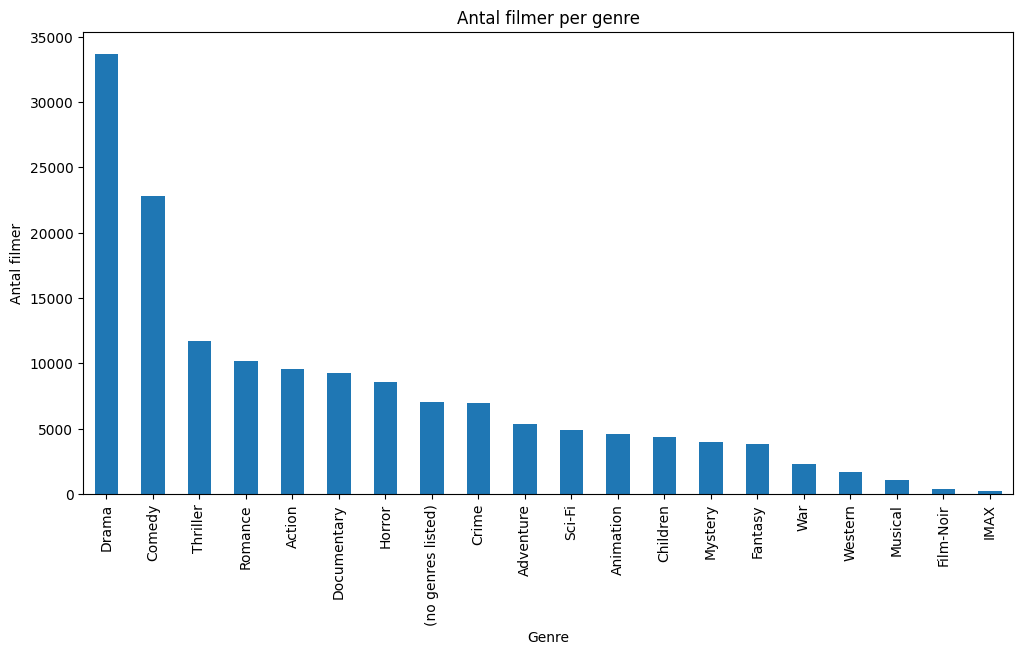

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain

# Create a Series where each genre for each movie is a separate element
all_genres = pd.Series(chain.from_iterable(
    movie.split('|') for movie in df_movies['genres']
))

# count the frequency of each genre
genre_counts = all_genres.value_counts()


plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Antal filmer per genre')
plt.xlabel('Genre')
plt.ylabel('Antal filmer')
plt.xticks(rotation=90)
plt.show()


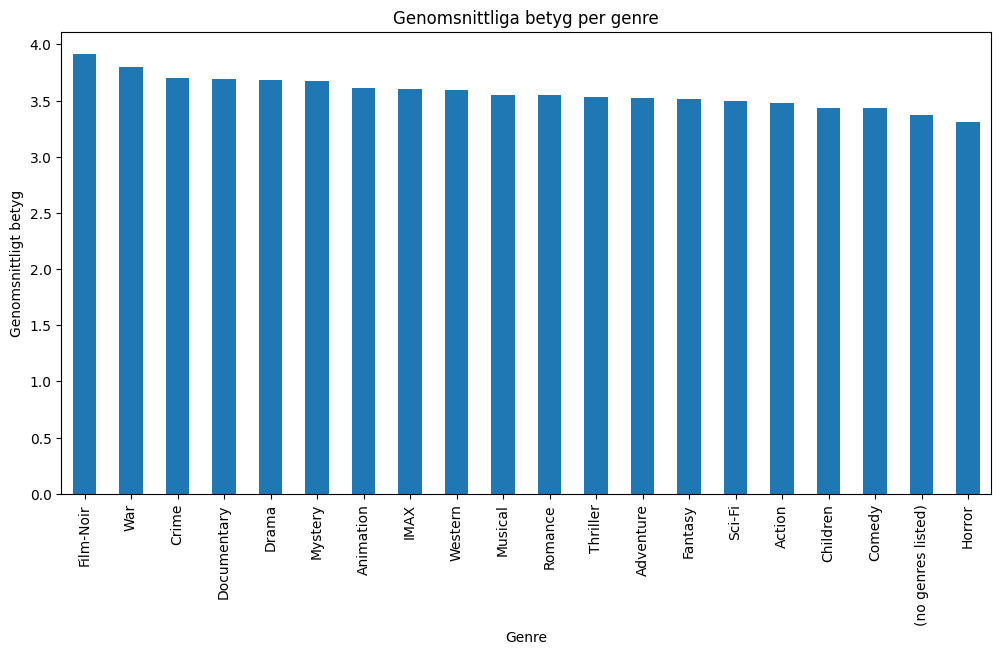

In [40]:
# create a datafram where each row connects a movie to a genre
genres_expanded = df_movies['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')

# connect to df_movies to get the movieId
genres_with_movieId = genres_expanded.join(df_movies['movieId'], how='left')

# merge with rating from df_rating
genres_with_ratings = genres_with_movieId.merge(df_rating, on='movieId', how='left')

# calculate the mean rating for each genre
average_rating_per_genre = genres_with_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
average_rating_per_genre.plot(kind='bar')
plt.title('Genomsnittliga betyg per genre')
plt.xlabel('Genre')
plt.ylabel('Genomsnittligt betyg')
plt.xticks(rotation=90)
plt.show()


--------------


1.2 Skapa gles matris
- Likt i videon i uppgift 1.0 skapade du en pivottabell av dataframet med index: "movieId", columns: "userId" och values: "ratings". 
- Denna pivottabell är dock "dyr" att skapa och förmodligen kommer inte din dator att klara av skapa den om du inte filtrerar bort viss data. 
- Fundera ut ett lämpligt sätt att filtrera ditt dataset, pröva dig fram och motivera.
- Skapa en gles (sparse) matris av denna pivottabell mha scipy.sparse.csc_matrix(). Vill du använda
- dig av all data går det också att lösa, men du behöver lösa hur du skapar den glesa matrisen utan pandas pivot-tabell.


In [41]:
df_rating

 

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [42]:
df_movies.shape

(86537, 4)

In [62]:
df_rating

,userId,movieId,rating,timestamp,date
0,1,1,4.0,1225734739,2008-11-03 17:52:19
1,1,110,4.0,1225865086,2008-11-05 06:04:46
2,1,158,4.0,1225733503,2008-11-03 17:31:43
3,1,260,4.5,1225735204,2008-11-03 18:00:04
4,1,356,5.0,1225735119,2008-11-03 17:58:39
...,...,...,...,...,...
33832157,330975,8340,2.0,1091583256,2004-08-04 01:34:16
33832158,330975,8493,2.5,1091585709,2004-08-04 02:15:09
33832159,330975,8622,4.0,1091581777,2004-08-04 01:09:37
33832160,330975,8665,3.0,1091581765,2004-08-04 01:09:25


# Filtrera datan

- Filtrerar datan genom att sätta ett tidsintervall mellan 1/1-18 och 31/12-23.
- Filtrerar även datan på ratings som är över 3.5. 
- Endast filmer med över 50 ratings är med i det filtrerade datasetet.
- Fick genom detta ner sample sizen från 33.8 miljoner till 3.5 miljoner som borde vara mer hanterbart. 

In [67]:
df_rating['date'] = pd.to_datetime(df_rating['timestamp'], unit='s')

start_date = pd.Timestamp(year=2018, month=1, day=1)
end_date = pd.Timestamp(year=2023, month=12, day=31)

df_time_filtered = df_rating[(df_rating['date'] >= start_date) & (df_rating['date'] <= end_date)]
df_rating_filtered = df_time_filtered[df_time_filtered['rating'] > 3.5]

rating_counts = df_rating_filtered.groupby('movieId').size()

movies_with_enough_ratings = rating_counts[rating_counts >= 50].index

df_final_filtered = df_rating_filtered[df_rating_filtered['movieId'].isin(movies_with_enough_ratings)]

df_final_filtered

,userId,movieId,rating,timestamp,date
153,3,296,5.0,1536173908,2018-09-05 18:58:28
154,3,318,5.0,1536173843,2018-09-05 18:57:23
155,3,858,5.0,1536173849,2018-09-05 18:57:29
156,3,2959,5.0,1536173840,2018-09-05 18:57:20
157,3,3114,5.0,1536174265,2018-09-05 19:04:25
...,...,...,...,...,...
33831033,330964,26064,5.0,1649167727,2022-04-05 14:08:47
33831034,330964,26082,5.0,1649131077,2022-04-05 03:57:57
33831035,330964,26662,4.5,1686534444,2023-06-12 01:47:24
33831036,330964,31364,5.0,1649130647,2022-04-05 03:50:47


### Pivottabell

In [68]:
pivot_table = df_final_filtered.pivot(index='movieId', columns='userId', values='rating')

pivot_table_filled = pivot_table.fillna(0)



In [69]:
pivot_table_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5238 entries, 1 to 288265
Columns: 63458 entries, 3 to 330964
dtypes: float64(63458)
memory usage: 2.5 GB


### Skapa gles matris

- Genom nedan kod omvandlas datasetet df_rating_filtered till en gles matris. 
 - ratings är de värden som ska fylla matrisen. 
 - rows bestämmer vilken rad varje betyg ska placeras på i matrisen, baserat på filmens ID.
 - cols bestämmer kolumnplaceringen för varje betyg.

csc_matrix skapar med dessa parametrar en struktur där varje element representerar ett betyg från en specifik användare till en specifik film.

In [70]:
from scipy.sparse import csc_matrix

sparse_matrix = csc_matrix(pivot_table_filled)


In [71]:
sparse_matrix

<5238x63458 sparse matrix of type '<class 'numpy.float64'>'
	with 3514713 stored elements in Compressed Sparse Column format>

-----


### 1.3 Recommender system
Skapa ett recommender system med KNN och låt systemet ta input från användaren och skriva ut top 5
rekommenderade filmerna, baserat på användarens sökquery. Observera att det finns ett logiskt fel i
videon som gör att rekommendationerna inte blir så bra, försök hitta felet och åtgärda det.
 - a) Beskriv med ord hur ditt system fungerar.
 - b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte
källhänvisa.


In [76]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

model_knn = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=20)

model_knn.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [89]:

def recommender(movie_name, data, model, n_recommendations=5):
    
    best_match = process.extractOne(movie_name, df_movies["title"])
    idx = best_match[2]
    print(f"Movie selected: {df_movies['title'].iloc[idx]}")
    
    print("searching for recommendation.....")
    distances, indices = model.kneighbors(data[idx], n_neighbors=n_recommendations + 1)
    recommender_indices = indices[0][indices[0] != idx]
    
    print("Top 5 recommendations: ")
    for i in recommender_indices[:n_recommendations]:
        print(df_movies["title"].iloc[i])

user_input = input("Enter a movie name: ")
recommender(user_input, sparse_matrix, model_knn, 5 )


Movie selected: Lion King, The (1994)
searching for recommendation.....
Top 5 recommendations: 
Flirt (1995)
Client, The (1994)
Richie Rich (1994)
Waiting for Guffman (1996)
And Nobody Weeps for Me (Und keiner weint mir nach) (1996)
